In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm

from ExKMC.Tree import Tree

import reviewer_roles_lib

with open('features.json', 'r') as f:
    features_list = json.load(f)
    
features_df = pd.DataFrame.from_dict(features_list)

<AxesSubplot:ylabel='Count'>

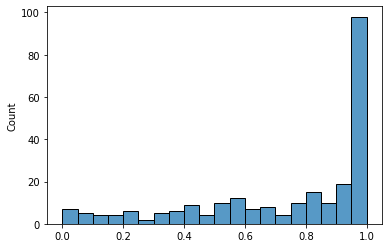

In [2]:
agreeability = [i for i in features_df["agreeability"] if i is not None]
sns.histplot(data=agreeability, bins=20)

<AxesSubplot:>

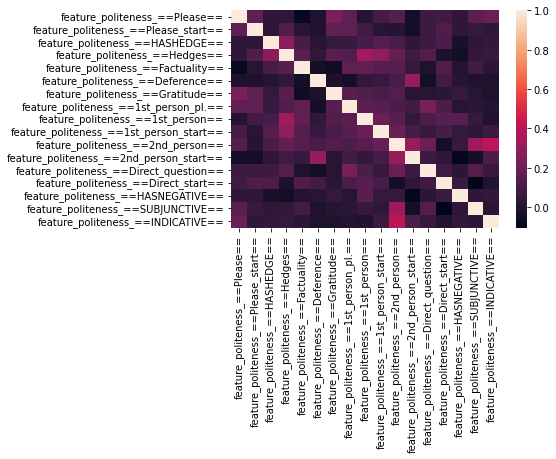

In [3]:
politeness_feature_names = [feat for feat in features_df.columns if feat.startswith("feature_politeness")]
politeness_df = features_df[politeness_feature_names]
politeness_df = politeness_df.loc[:, (politeness_df != 0).any(axis=0)] # Drop all 0 rows
politeness_df = politeness_df.loc[:, (politeness_df != 1).any(axis=0)] # Drop all 0 rows

sns.heatmap(politeness_df.corr())

In [4]:
# def get_review_label_map(features_list):
#     review_label_map = {}
#     for feature_map in features_list:
#         review_label_map[feature_map["review_id"]] = {k:v for k,v in feature_map.items() if type(v) in [int, float]}
#     return review_label_map

# from sklearn.feature_extraction import DictVectorizer
# review_label_map = get_review_label_map(features_list)
# sorted_review_ids = sorted(review_label_map.keys())
# featurized_labels = [review_label_map[k] for k in sorted_review_ids]
# feature_vectorizer = DictVectorizer()
# feature_array = feature_vectorizer.fit_transform(featurized_labels).toarray()


# for num_clusters in tqdm.tqdm(list(range(5,9))):
#     print("\nRules for ", num_clusters, " clusters")
#     tree = Tree(k=num_clusters, max_leaves=num_clusters) 
#     prediction = tree.fit_predict(feature_array)
#     tree.plot('tree_plot_'+str(num_clusters))
#     reviewer_roles_lib.tree_parser('tree_plot_'+str(num_clusters)+".gv", feature_vectorizer) 

In [5]:
norm_arg_names = [feat for feat in features_df.columns if feat.startswith("normalized_arg_")]
norm_arg_df = features_df[norm_arg_names].dropna()

In [6]:
import reviewer_roles_lib

<Figure size 96000x105600 with 0 Axes>

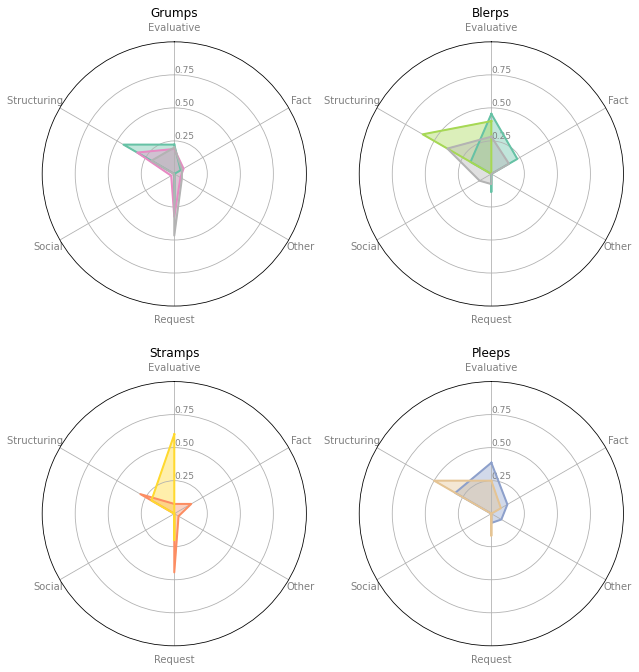

In [7]:
CATEGORIES = list(sorted(norm_arg_df.columns))

CATEGORY_RENAMER = {
"normalized_arg_evaluative": "Evaluative",
"normalized_arg_fact": "Fact",
"normalized_arg_other": "Other",
"normalized_arg_request": "Request",
"normalized_arg_social": "Social",
"normalized_arg_structuring": "Structuring        "
}

RENAMED_CATEGORIES = [CATEGORY_RENAMER[cat] for cat in CATEGORIES]

MY_PALETTE = plt.cm.get_cmap("Set2", 10)

TITLES = [
    "Grumps", "Blerps", "Stramps", "Pleeps"
]


axes = reviewer_roles_lib.initialize_spiders(CATEGORIES, RENAMED_CATEGORIES, TITLES)



for i, row_dict in enumerate(norm_arg_df.to_dict(orient="records")[:10]):
    reviewer_roles_lib.make_spider(axes[i%4], row_dict, MY_PALETTE(i), CATEGORIES)
 
plt.savefig("blerp.png")